In [15]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D

In [9]:
X_train=np.loadtxt('input.csv', delimiter=',')
Y_train=np.loadtxt('labels.csv', delimiter=',')

X_test=np.loadtxt('input_test.csv', delimiter=',')
Y_test=np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
#After creating the training and testing variables above, we start to create the model for cnn. Each dataset contains values for each variable.
#We use np in place of pd because the datasets we're dealing with are in the form of numpy arrays.

In [10]:
#Reshaping the flattened arrays in order to arrange them in 100x 100 pixels with 3 rgb values:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [11]:
#Scaling the rgb values to make them all fall between zero to one by dividing them with 256:
X_train=X_train/255.0
X_test=X_test/255.0

In [16]:
#Kmowing the structure of testing nd training variables:
print('X_train:',X_train.shape)
print('Y_train:',Y_train.shape)
print('X_test:',X_test.shape)
print('Y_test:',Y_test.shape)

X_train: (2000, 100, 100, 3)
Y_train: (2000, 1)
X_test: (400, 100, 100, 3)
Y_test: (400, 1)


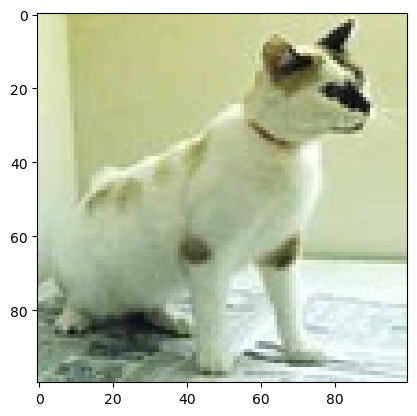

In [19]:
#Selecting a random value from X_train:
value=random.randint(0, len(X_train))
plt.imshow(X_train[value,:])
plt.show()

In [21]:
#Creating the model:
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)), #Adding Convolutional Layer 1
    MaxPooling2D((2,2)), #Adding a pooling layer for convolutional layer 1
    
    Conv2D(32, (3,3), activation='relu'), #Adding Convolutional Layer 2
    MaxPooling2D((2,2)), #Adding a pooling layer for convolutional layer 2
    
    #Flatteining the array back and adjusting it in ANN layers:
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\de\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Creating the model:
model=Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)), #Adding Convolutional Layer 1
    MaxPooling2D((pool_size=(2,2))), #Adding a pooling layer for convolutional layer 1
    
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'), #Adding Convolutional Layer 2
    MaxPooling2D((pool_size=(2,2))) #Adding a pooling layer for convolutional layer 2
    
    #Flatteining the array back and adjusting it in ANN layers:
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (252057834.py, line 4)

In [22]:
#Compile the model:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.5177 - loss: 0.8121
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5568 - loss: 0.6911
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5861 - loss: 0.6663
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.6941 - loss: 0.5980
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 279ms/step - accuracy: 0.7111 - loss: 0.5589


In [25]:
#Evaluate based on test variables:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6509 - loss: 0.6408


[0.6414785981178284, 0.6349999904632568]

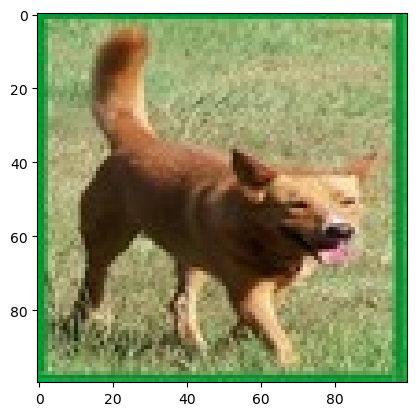

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Its a dog


In [28]:
#Predicting by giving in random input from within the Y_test:
value2=random.randint(0,len(X_test))
plt.imshow(X_test[value2, :])
plt.show()

y_pred=model.predict(X_test[value2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if (y_pred==0):
    print('Its a dog')
else:
    print('Its a cat')